In [5]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [6]:
FILE_NAME = '64_relu_30_10_adjacentTF_1e-4'

df = pd.read_csv(f'./emb/{FILE_NAME}.csv', index_col=0)
df.drop(['type'], axis=1, inplace=True)
df

0    1         2    3         4    5         6         7  \
MCHR1     0.000000  0.0  0.175333  0.0  0.238012  0.0  0.012345  0.117338   
PSMD9     0.045488  0.0  0.000000  0.0  0.000000  0.0  0.000000  0.000000   
CRIP1     0.000000  0.0  0.000000  0.0  0.000000  0.0  0.000000  0.000000   
GIMAP4    0.000000  0.0  0.000000  0.0  0.000000  0.0  0.000000  0.000000   
GATM      0.000000  0.0  0.230896  0.0  0.133751  0.0  0.000000  0.112083   
...            ...  ...       ...  ...       ...  ...       ...       ...   
ERCC5     0.000000  0.0  0.000000  0.0  0.000000  0.0  0.000000  0.000000   
MARVELD1  0.000000  0.0  0.157524  0.0  0.094271  0.0  0.015469  0.128557   
YTHDC2    0.000000  0.0  0.000000  0.0  0.000000  0.0  0.000000  0.000000   
SRC       0.000000  0.0  0.000000  0.0  0.000000  0.0  0.000000  0.000000   
C1GALT1   0.000000  0.0  0.148902  0.0  0.293981  0.0  0.000000  0.087236   

            8    9  ...        54        55   56        57        58  \
MCHR1     0.0  0.0  ...  0.021693  0.014245  0.0  0.113044  0.156414   
PSMD9     0.0  0.0  ...  0.172744  0.000000  0.0  0.194257  0.071825   
CRIP1     0.0  0.0  ...  0.239228  0.000000  0.0  0.000000  0.000000   
GIMAP4    0.0  0.0  ...  0.278752  0.000000  0.0  0.000000  0.000000   
GATM      0.0  0.0  ...  0.021375  0.014036  0.0  0.111386  0.154119   
...       ...  ...  ...       ...       ...  ...       ...       ...   
ERCC5     0.0  0.0  ...  0.000000  0.000000  0.0  0.312228  0.183298   
MARVELD1  0.0  0.0  ...  0.023136  0.015193  0.0  0.120564  0.166819   
YTHDC2    0.0  0.0  ...  0.248814  0.000000  0.0  0.000000  0.000000   
SRC       0.0  0.0  ...  0.000000  0.000000  0.0  0.362788  0.218064   
C1GALT1   0.0  0.0  ...  0.020897  0.013722  0.0  0.108895  0.150673   

                59   60        61        62        63  
MCHR1     0.000000  0.0  0.165516  0.257765  0.234147  
PSMD9     0.179744  0.0  0.000000  0.000000  0.000000  
CRIP1     0.150219  0.0  0.000000  0.000000  0.000000  
GIMAP4    0.143710  0.0  0.000000  0.000000  0.000000  
GATM      0.000000  0.0  0.163088  0.253983  0.230712  
...            ...  ...       ...       ...       ...  
ERCC5     0.251013  0.0  0.079924  0.000000  0.000000  
MARVELD1  0.000000  0.0  0.176527  0.274913  0.249724  
YTHDC2    0.165049  0.0  0.000000  0.000000  0.000000  
SRC       0.178515  0.0  0.097359  0.000000  0.000000  
C1GALT1   0.000000  0.0  0.159442  0.248305  0.225554  

[18573 rows x 64 columns]

Running TSNE...
Plotting...


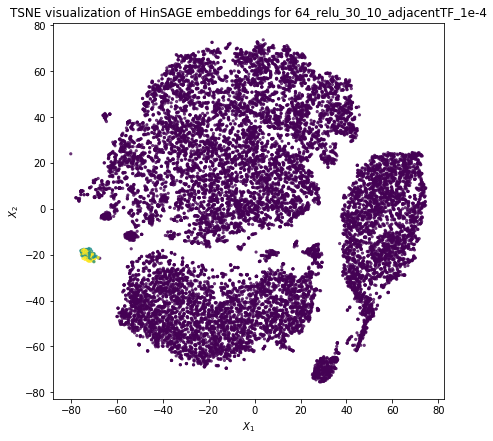

In [7]:
all_embeddings = df.to_numpy()
print('Running TSNE...')
trans = TSNE(n_components=2, random_state=0)
emb_transformed = pd.DataFrame(trans.fit_transform(all_embeddings), index=df.index)

def geneType(name):
    if name[-2:] == '_k':
        return 1
    elif name[-3:] == '_gm':
        return 2
    else:
        return 0

emb_transformed['type'] = emb_transformed.index.map(geneType)

alpha = 0.7

print('Plotting...')
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(
    emb_transformed[0],
    emb_transformed[1],
    c=emb_transformed["type"],
#     cmap="Paired",
    alpha=alpha,
    s=5
)
ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title(f"TSNE visualization of HinSAGE embeddings for {FILE_NAME}")

plt.savefig(f'./img/full/{FILE_NAME}.png', dpi=150)
plt.show()